# Sathvik Radhakrishnan

## Research question/interests

I would like to know the relationships between different parameters (nationality, age, position, speed) and their relationship to a players market value.


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

In [77]:
#Loading the data set

df = pd.read_csv("../data/raw/FIFA22_official_data.csv")

In [78]:
#Getting basic information about dataset
print(df.Value.head(10))
print(df.shape)
print(df.columns)

0    €107.5M
1       €93M
2     €44.5M
3    €125.5M
4       €37M
5      €108M
6     €28.5M
7     €40.5M
8       €35M
9       €53M
Name: Value, dtype: object
(16710, 65)
Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHand

In [79]:
#To see the number of unique entries
df.nunique(axis=0)

ID                     16710
Name                   16089
Age                       30
Photo                  16710
Nationality              168
                       ...  
GKReflexes                74
Best Position             15
Best Overall Rating       51
Release Clause          1170
DefensiveAwareness        90
Length: 65, dtype: int64

In [80]:
#To see the number of countries included in the game and the sorted list of countries
print(len(df.Nationality.unique()))
print(sorted(df.Nationality.unique()))

168
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada', 'Cape Verde Islands', 'Central African Republic', 'Chad', 'Chile', 'China PR', 'Chinese Taipei', 'Colombia', 'Comoros', 'Congo', 'Congo DR', 'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', "Côte d'Ivoire", 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Grenada', 'Guam', 'Guatemala', 'Guinea', 'Guinea Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Italy', 'Jamaica', 'Japan

In [81]:
#Function to clean up the currenncy columns

def convert_currency_to_number(value):
    '''Converts currency from a string with currency logo and short form for million and kilo to only numbers'''
    value = str(value).strip('€')
    if "M" in value:
        value = re.sub("[^0-9]", "", value)
        value = float(value)*1000000
    elif "K" in value: 
        value = re.sub("[^0-9]", "", value)
        value = float(value)*1000
    return(float(value))

In [82]:
#The value is a string, need to remove euro symbol and convert to double
#Also convert M and K to their numberical values
df['Value'] = df['Value'].map(lambda x: convert_currency_to_number(x))
print(df.Value)

#The value of the players are now in float format and dont have the unnecessary symbols

0        1.075000e+09
1        9.300000e+07
2        4.450000e+08
3        1.255000e+09
4        3.700000e+07
             ...     
16705    1.000000e+05
16706    1.800000e+05
16707    1.000000e+05
16708    1.100000e+05
16709    0.000000e+00
Name: Value, Length: 16710, dtype: float64


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167]),
 [Text(0, 0, 'England'),
  Text(1, 0, 'Spain'),
  Text

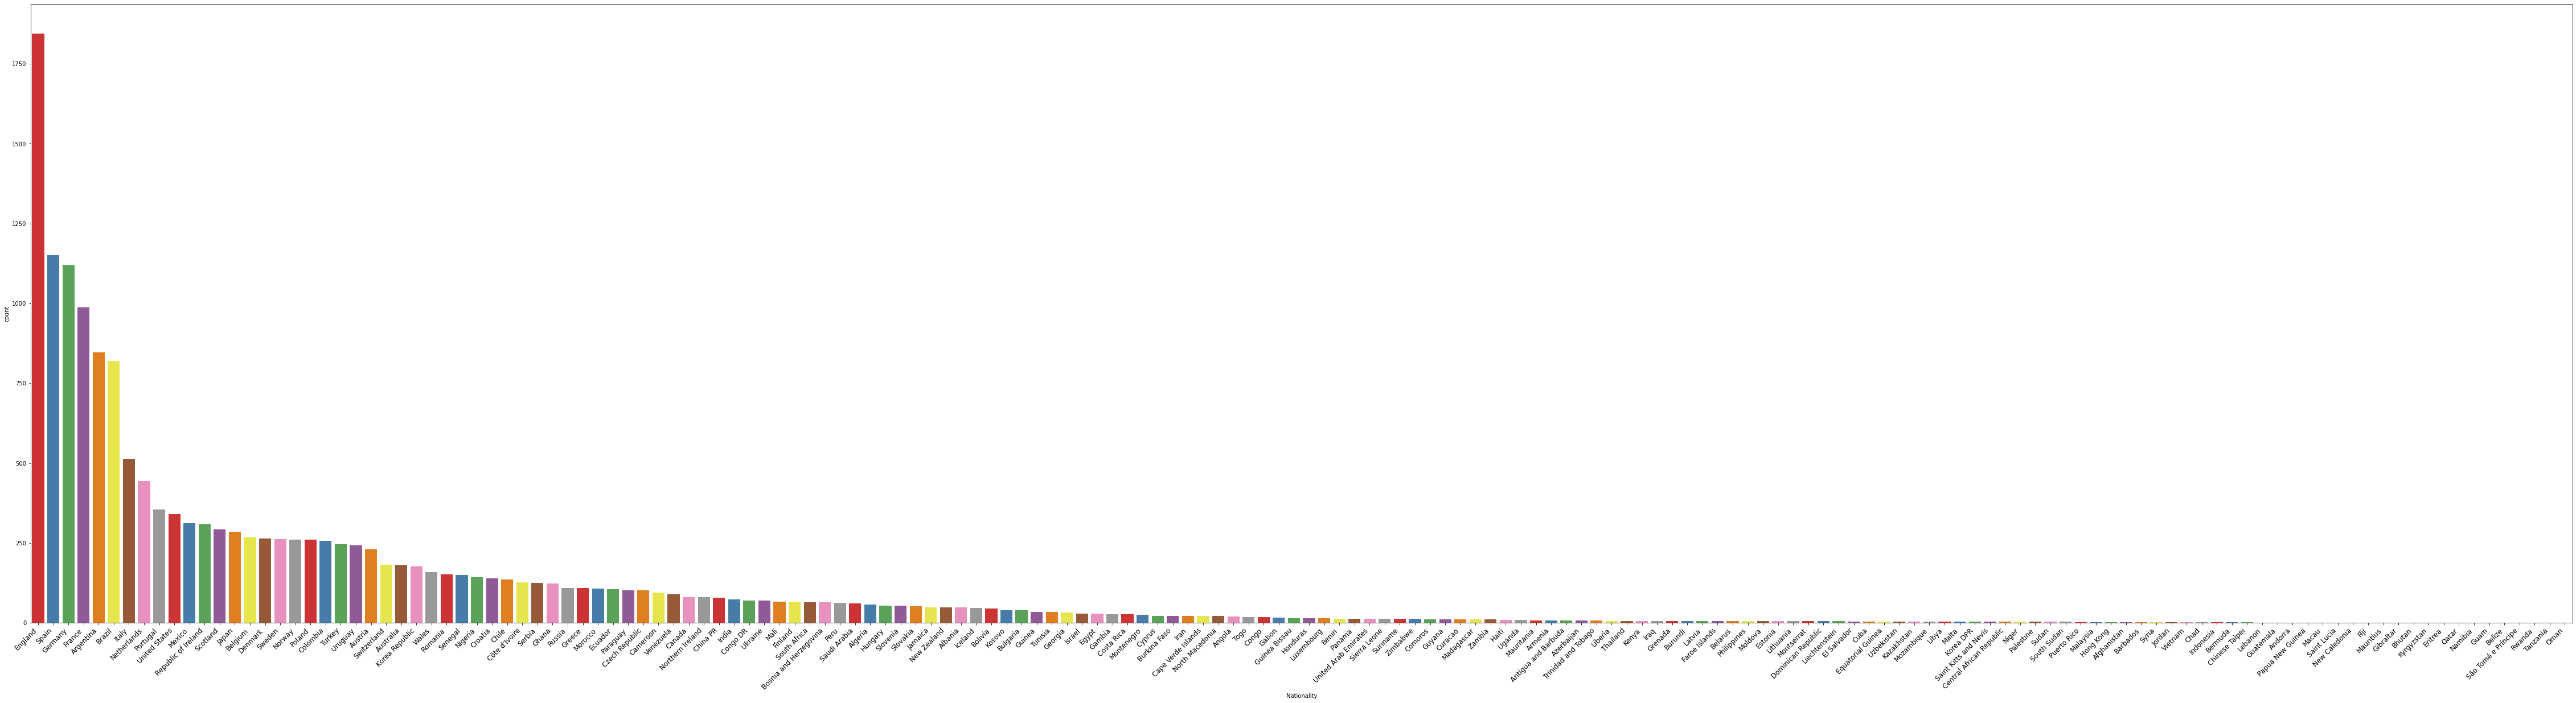

In [83]:
#Plot to see which country has the most number of players

plt.figure(figsize=(80,20))
chart = sns.countplot(
    data=df,
    x='Nationality',
    palette='Set1',
    order = df['Nationality'].value_counts().index
)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

# Looks like England has the highest followed by Spain and Germany

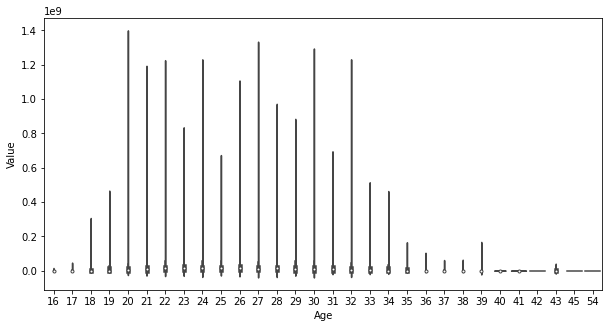

In [84]:
#Distribution of age and value
plt.figure(figsize=(10,5))
chart = sns.violinplot(x='Age',y='Value',data=df)

#I can see that the value of a player is at the hidgest when they are between 20 - 30 years old

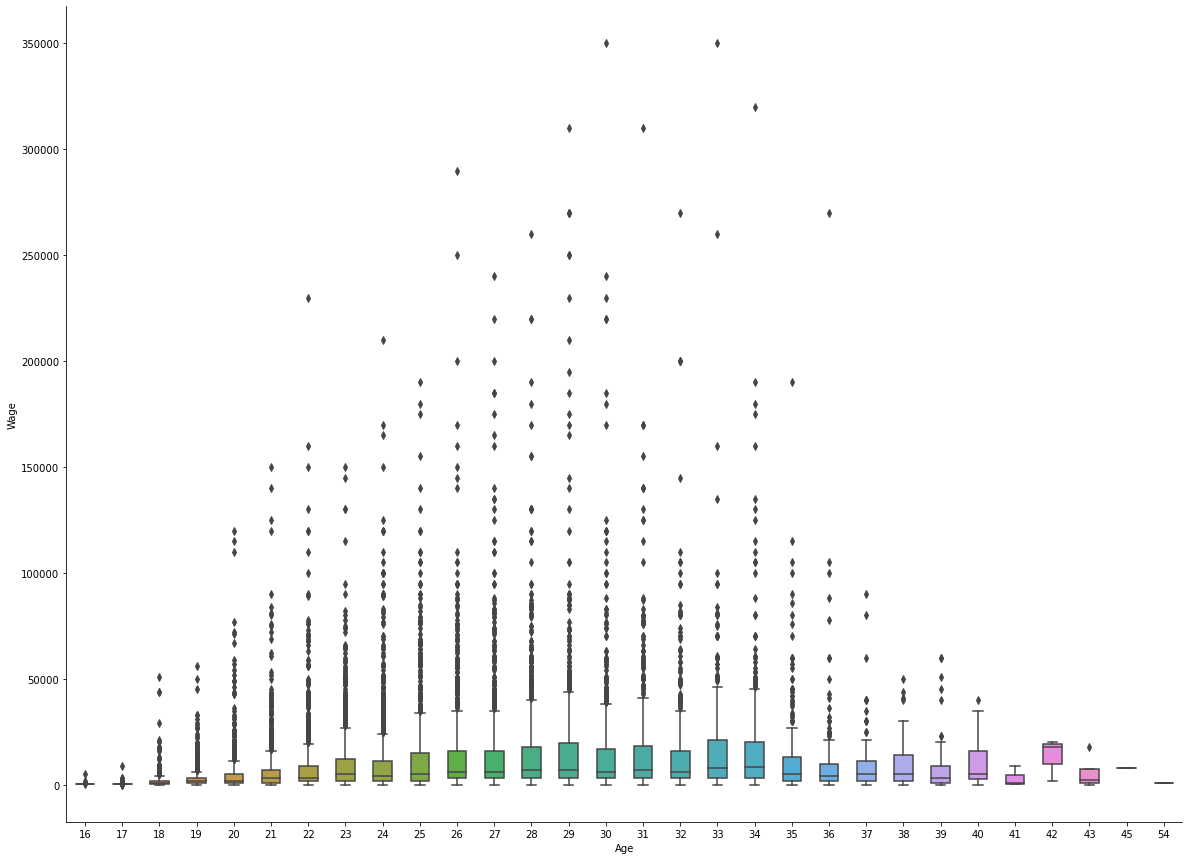

In [85]:
#Age vs Wage 
df['Wage'] = df['Wage'].map(lambda x: convert_currency_to_number(x))

plt.figure(figsize=(20,15))
chart = sns.boxplot(x='Age', y='Wage', data=df,
          width=0.5)
sns.despine()

#We can see that there is a litte correalion between the age and wage. I will explore this later using a heat map

In [86]:
def clean_position(pos):
    """Function to clean the position column of the data set to extract important information"""
    if isinstance(pos, str) == False:
        pos_cleaned = "NA"
    else:
        pos_cleaned = ''.join([a for a in pos if a.isupper()])
        print(pos_cleaned)
    return pos_cleaned

df['Position'] = df['Position'].map(lambda x: clean_position(x) )


CAM
LDM
RS
RCM
LB
RDM
LCM
SUB
SUB
LS
RCM
RM
LCB
LB
RCM
RCM
SUB
RCM
SUB
RM
RCM
LB
LB
LM
RB
RCM
SUB
RDM
CDM
RW
LCM
LW
LB
ST
RW
LB
ST
SUB
LM
ST
RB
CDM
CM
SUB
LCM
LDM
RCM
LCM
LCM
SUB
CAM
LDM
RF
RB
LM
LW
CAM
RCM
RB
RDM
RB
LB
LWB
LCM
LW
SUB
RAM
SUB
CF
RES
SUB
RCM
SUB
SUB
SUB
SUB
SUB
RCM
RB
SUB
LB
SUB
ST
SUB
RB
RES
LDM
RM
SUB
RCM
CAM
RW
LCM
SUB
CDM
RS
CDM
LB
RDM
LCM
RES
SUB
LDM
SUB
RDM
CAM
SUB
SUB
SUB
LCM
LM
RES
RES
SUB
RES
CAM
LCM
SUB
LB
SUB
CAM
RCM
RB
SUB
SUB
RB
LM
SUB
LS
LW
SUB
SUB
SUB
LB
LCM
LF
RES
SUB
LCM
RCM
RDM
RCM
SUB
RCM
RCM
CDM
SUB
RW
RDM
SUB
CAM
RES
LDM
SUB
ST
LDM
CAM
CAM
LCM
LW
LB
LCM
CAM
LM
SUB
LWB
LDM
LB
RCM
SUB
SUB
LB
RB
SUB
RAM
CAM
LCM
LCM
RF
RCM
SUB
LB
LM
SUB
RB
SUB
LM
SUB
RB
LCM
CAM
RB
RCM
SUB
LS
LCM
ST
SUB
RCM
CAM
CM
CF
SUB
RCM
CAM
RS
LCM
LM
LCM
ST
LB
CDM
SUB
RDM
LCB
RDM
SUB
ST
LDM
RM
SUB
LB
LDM
RB
SUB
RCM
RES
LCM
SUB
RDM
LW
LCB
ST
SUB
SUB
LDM
RCM
RM
LCB
RCM
LCM
LCB
ST
SUB
SUB
LDM
SUB
LCM
RB
SUB
RM
RS
RM
LCB
RM
LM
RB
SUB
SUB
RW
CDM
RM
CM
RWB
CAM
CDM
LB
LB
SUB
RM
CDM
RB
RES


SUB
CAM
RCB
RM
RCB
SUB
RCM
RS
SUB
RM
SUB
SUB
SUB
LM
SUB
LW
LB
SUB
SUB
SUB
SUB
RCM
RB
CAM
RWB
CM
CAM
SUB
SUB
RM
SUB
SUB
SUB
SUB
RES
RES
RCM
RES
LCB
SUB
LB
RB
LCM
RM
SUB
RCM
RB
RES
SUB
SUB
CAM
SUB
LB
RES
RCB
LCM
SUB
RCB
SUB
SUB
SUB
CAM
SUB
SUB
SUB
SUB
CM
RM
CDM
LCB
RB
LCM
RB
SUB
SUB
SUB
CDM
SUB
CB
SUB
SUB
ST
LB
RB
RB
SUB
RB
LM
LW
RCM
SUB
SUB
SUB
CM
SUB
RCM
SUB
SUB
CDM
LDM
LM
LWB
CAM
SUB
SUB
CAM
LM
SUB
RCM
SUB
SUB
CAM
ST
LDM
SUB
LCB
SUB
SUB
LB
CDM
RB
LB
LWB
SUB
RM
RCB
SUB
SUB
LM
SUB
SUB
CAM
SUB
RCM
RES
RB
LCB
LB
RM
LCB
LM
RCB
SUB
CAM
LW
SUB
LS
LDM
SUB
SUB
CDM
RS
RCB
RES
RM
LS
SUB
RM
SUB
CAM
RB
CM
RCM
SUB
LS
SUB
RES
LS
SUB
RES
LB
SUB
RCB
RDM
SUB
SUB
RB
CAM
SUB
LM
RCB
SUB
SUB
CAM
RDM
RM
LWB
LCM
RB
CAM
SUB
LCM
CDM
LCM
LM
SUB
LW
LB
RES
SUB
RES
RW
SUB
RDM
RES
LM
RCB
LB
RDM
SUB
SUB
SUB
SUB
SUB
ST
LCM
SUB
SUB
CM
SUB
ST
SUB
CAM
RB
SUB
LCM
RCM
SUB
SUB
SUB
SUB
SUB
SUB
RF
LCM
ST
RB
RCM
SUB
SUB
SUB
CM
RCM
LB
RES
CAM
LS
RCM
RCM
SUB
SUB
RES
SUB
CAM
SUB
SUB
LM
SUB
LB
SUB
LS
RES
RCB
RB
SUB
RES
SUB
RB
RCM

SUB
SUB
SUB
SUB
CDM
LS
RM
LM
SUB
SUB
RF
SUB
LM
RES
SUB
SUB
LWB
RM
ST
RCB
CAM
RES
SUB
RB
ST
RES
SUB
SUB
SUB
SUB
SUB
LCB
SUB
RS
RCM
RDM
SUB
RES
SUB
LW
RM
SUB
SUB
RES
LCM
SUB
SUB
LW
SUB
LAM
SUB
SUB
RM
SUB
SUB
LW
RES
SUB
RES
SUB
LM
LCM
LCB
ST
SUB
RF
LB
SUB
LDM
LW
LM
RB
SUB
RES
SUB
RES
SUB
ST
SUB
RES
SUB
RES
SUB
SUB
CAM
SUB
LM
RDM
LDM
ST
SUB
SUB
RES
SUB
RM
SUB
SUB
SUB
RCB
SUB
SUB
RM
ST
SUB
LB
SUB
SUB
SUB
SUB
SUB
SUB
ST
SUB
RES
SUB
RB
LF
LB
RES
LM
RES
SUB
RW
RES
CDM
SUB
RB
SUB
SUB
SUB
SUB
RM
RCM
SUB
SUB
RES
SUB
RES
SUB
RCM
LCB
RCM
RS
SUB
SUB
LDM
SUB
RW
LCB
SUB
SUB
LCB
SUB
SUB
SUB
SUB
LW
SUB
LW
SUB
SUB
SUB
LCB
SUB
SUB
SUB
SUB
RB
SUB
SUB
RCB
LS
LWB
SUB
LW
SUB
CAM
LCB
RDM
LDM
LB
SUB
RW
SUB
LM
RES
LCB
CAM
SUB
LCB
RCB
SUB
CB
SUB
RES
SUB
SUB
SUB
SUB
SUB
RES
CAM
SUB
RDM
SUB
SUB
CDM
SUB
LW
RES
RM
RES
LDM
SUB
LB
CAM
SUB
SUB
CB
SUB
SUB
LCB
SUB
RB
SUB
SUB
SUB
SUB
LM
LM
RF
SUB
CDM
LS
SUB
RM
RCM
RES
RES
RES
SUB
SUB
SUB
SUB
ST
RCM
RCB
LCB
SUB
SUB
SUB
SUB
SUB
SUB
RES
SUB
SUB
RB
LW
RES
LDM
SUB
CAM
RM
SUB
SU

SUB
SUB
LM
RES
LCB
LDM
ST
RB
RES
RES
RS
ST
RDM
SUB
RES
ST
RW
CM
SUB
SUB
RES
RWB
RB
LB
LCB
SUB
SUB
SUB
SUB
SUB
SUB
RES
SUB
LB
SUB
SUB
RDM
SUB
SUB
SUB
SUB
RES
RCB
SUB
RWB
CB
SUB
LCB
RCB
SUB
SUB
ST
SUB
ST
SUB
RES
SUB
RM
SUB
ST
LM
SUB
SUB
RCB
SUB
RS
SUB
SUB
RES
RB
CAM
RES
LW
RWB
RB
RCB
LW
SUB
SUB
ST
SUB
RDM
LB
RW
LCM
ST
SUB
SUB
RES
CAM
SUB
SUB
SUB
LCB
RM
RES
LW
SUB
SUB
SUB
SUB
LM
RES
SUB
SUB
SUB
SUB
LWB
RM
SUB
SUB
SUB
LCB
SUB
LCB
ST
RES
CB
SUB
SUB
SUB
SUB
RCB
CAM
LS
SUB
LWB
RDM
LM
SUB
SUB
RES
SUB
SUB
SUB
SUB
SUB
RCB
SUB
SUB
SUB
SUB
SUB
RDM
SUB
SUB
RES
SUB
RM
LCM
RS
RCB
LWB
SUB
RM
RB
SUB
LCB
SUB
RB
RCM
SUB
SUB
LCB
SUB
RM
SUB
RES
RB
SUB
RDM
SUB
SUB
SUB
RES
SUB
SUB
LCB
SUB
LB
SUB
SUB
RES
SUB
LCB
RES
SUB
RCM
ST
RM
SUB
SUB
SUB
SUB
SUB
RCB
SUB
RS
ST
LM
LCB
LB
SUB
LS
SUB
SUB
SUB
SUB
RM
SUB
RW
SUB
RES
RES
LM
LCM
LCM
SUB
SUB
SUB
LCB
RES
RES
LCM
RB
SUB
RCB
RES
SUB
RES
LWB
LCB
SUB
SUB
SUB
SUB
SUB
SUB
SUB
LCB
SUB
LS
RCB
CDM
CAM
RS
SUB
RES
SUB
LCB
SUB
ST
RCB
SUB
RES
RES
SUB
LWB
SUB
ST
CAM
SUB
RCB
SUB
S

LCB
LCB
RES
LCB
SUB
RW
SUB
RCB
RES
SUB
SUB
RM
RCB
SUB
LB
SUB
LDM
SUB
SUB
RES
SUB
SUB
LB
RCB
SUB
SUB
SUB
LS
SUB
LB
SUB
LB
RES
RW
SUB
LB
RES
LB
SUB
SUB
RES
SUB
SUB
SUB
RES
SUB
LCB
LCM
RCB
SUB
SUB
SUB
SUB
ST
RB
RES
SUB
LDM
RCM
RES
RES
RES
SUB
SUB
SUB
RES
RES
RES
LWB
SUB
SUB
RB
SUB
RES
RES
SUB
RES
SUB
SUB
RB
SUB
SUB
RES
RES
LCB
SUB
SUB
LS
CB
RCM
SUB
SUB
RES
RCB
SUB
RES
SUB
RB
SUB
SUB
SUB
SUB
RES
SUB
RCM
SUB
RB
SUB
SUB
SUB
ST
RES
RES
SUB
RES
SUB
SUB
SUB
SUB
SUB
RM
RM
SUB
SUB
LCB
LS
SUB
SUB
RES
RB
SUB
RB
SUB
SUB
RES
SUB
CB
SUB
RCM
SUB
SUB
RB
SUB
RES
LM
SUB
LM
SUB
LS
SUB
SUB
SUB
SUB
RES
ST
SUB
SUB
SUB
RES
RB
SUB
RCB
ST
SUB
LCB
SUB
LW
RES
CAM
SUB
SUB
SUB
RS
RES
ST
ST
RES
SUB
SUB
LS
SUB
LW
LDM
RCB
SUB
SUB
CB
RES
SUB
RM
RES
RES
LM
RB
SUB
RES
SUB
LCB
LCB
RES
SUB
LB
SUB
SUB
SUB
SUB
SUB
RES
RES
SUB
SUB
SUB
RES
SUB
RES
SUB
RCB
LCB
LCB
RES
SUB
SUB
SUB
SUB
SUB
RES
ST
RB
SUB
SUB
SUB
SUB
LCM
SUB
RES
SUB
SUB
SUB
SUB
CB
SUB
RES
SUB
SUB
ST
SUB
RES
SUB
SUB
LCB
RES
RDM
ST
RES
RES
RB
LB
SUB
SUB
CAM
LW
RW
SUB


SUB
RCB
LCB
RDM
SUB
LCB
RCB
LCB
RES
LS
SUB
RES
SUB
RES
SUB
ST
RCB
SUB
SUB
RES
RCB
RES
RES
SUB
RWB
LCB
RES
SUB
RES
RB
SUB
RES
RES
SUB
SUB
RES
SUB
RES
RES
CB
RES
RES
SUB
SUB
SUB
SUB
RES
LCB
RES
RCB
RES
RES
SUB
RES
LB
SUB
RES
RCB
RCB
RES
RES
RM
SUB
RS
SUB
SUB
SUB
SUB
SUB
SUB
SUB
LCB
SUB
LCB
CB
RES
RES
SUB
ST
RES
RES
RES
RCB
SUB
RCB
SUB
SUB
SUB
LM
RES
RES
SUB
SUB
CM
RES
LCB
RES
RES
SUB
SUB
RCB
SUB
CB
SUB
RCB
LCB
LS
RES
RES
RES
RES
LCB
RES
RES
RES
SUB
SUB
SUB
RES
SUB
RES
SUB
SUB
LM
RES
SUB
RCB
RES
SUB
SUB
RES
SUB
SUB
LCB
SUB
RES
SUB
RES
RES
RES
SUB
SUB
RES
SUB
RCB
SUB
SUB
RES
SUB
RES
RES
RES
SUB
RES
SUB
RCB
RES
SUB
RES
SUB
RES
LM
RS
SUB
SUB
SUB
RES
RB
SUB
SUB
RES
SUB
RES
RES
RES
SUB
RES
RES
SUB
RCB
RES
SUB
RES
SUB
SUB
SUB
LB
SUB
RES
SUB
SUB
RCB
SUB
RES
SUB
SUB
SUB
RES
LCB
RES
RES
RES
LCB
RCB
RES
SUB
RW
SUB
SUB
LS
SUB
SUB
SUB
RES
RES
SUB
SUB
SUB
SUB
RES
RES
SUB
RES
RES
RES
SUB
SUB
SUB
LCB
RES
RB
SUB
SUB
RCB
SUB
CB
SUB
RES
SUB
SUB
SUB
SUB
SUB
SUB
RES
SUB
LCB
CB
SUB
RES
RES
RES
RES
SUB
RES
RES

GK
SUB
SUB
RES
SUB
SUB
GK
RES
GK
SUB
GK
GK
GK
GK
GK
GK
SUB
RES
RES
SUB
GK
SUB
GK
GK
GK
GK
SUB
GK
SUB
SUB
GK
GK
GK
SUB
GK
RES
SUB
SUB
GK
GK
GK
SUB
GK
GK
GK
SUB
SUB
GK
SUB
GK
SUB
GK
SUB
SUB
GK
SUB
SUB
GK
GK
SUB
GK
SUB
GK
GK
SUB
SUB
SUB
GK
SUB
GK
SUB
SUB
GK
RES
SUB
RES
GK
SUB
SUB
SUB
SUB
SUB
GK
SUB
GK
GK
RES
GK
SUB
SUB
RES
SUB
SUB
SUB
SUB
RES
SUB
SUB
GK
SUB
RES
SUB
GK
GK
GK
RES
GK
SUB
GK
GK
SUB
RES
SUB
GK
GK
SUB
SUB
GK
SUB
SUB
SUB
SUB
GK
RES
RES
SUB
SUB
SUB
SUB
RES
GK
SUB
RES
SUB
SUB
GK
GK
SUB
SUB
SUB
RES
GK
SUB
RES
SUB
RES
GK
GK
SUB
SUB
GK
SUB
SUB
GK
RES
GK
GK
SUB
GK
SUB
SUB
RCB
GK
SUB
SUB
SUB
SUB
GK
RES
SUB
SUB
RES
SUB
GK
SUB
GK
GK
GK
SUB
SUB
GK
GK
GK
GK
SUB
GK
GK
GK
SUB
SUB
SUB
GK
SUB
GK
SUB
RES
RES
SUB
SUB
SUB
GK
RES
SUB
GK
GK
RES
SUB
SUB
RES
SUB
SUB
GK
GK
RES
RES
GK
SUB
SUB
SUB
GK
SUB
GK
SUB
SUB
SUB
SUB
SUB
GK
RES
SUB
SUB
SUB
RES
GK
SUB
RES
GK
SUB
SUB
RES
SUB
SUB
SUB
SUB
RES
SUB
GK
GK
SUB
SUB
GK
GK
SUB
SUB
SUB
GK
RES
RES
SUB
SUB
SUB
RES
SUB
GK
SUB
SUB
RES
SUB
SUB
RES
GK
GK
GK
RES
SUB

<AxesSubplot:>

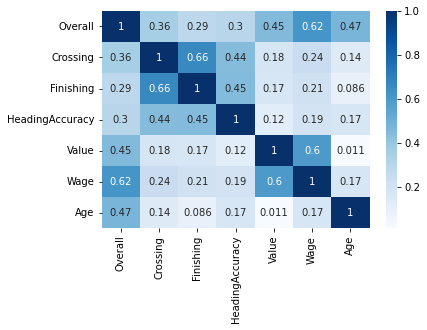

In [87]:
crash_mx = df[['Overall','Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'Value', 'Wage', 'Age', ]].corr()
sns.heatmap(crash_mx, annot=True, cmap='Blues')

#We can see that wage and value have minimal with age

In [ ]:
#Cleaning the data
"""
df = (   
    pd.DataFrame(data.data,columns=data.feature_names)
    .rename(columns={"color_intensity": "ci"})
    .assign(color_filter=lambda x: np.where((x.hue > 1) & (x.ci > 7), 1, 0))
    .loc[lambda x: x['alcohol']>14]
    .sort_values("alcohol", ascending=False)
    .reset_index(drop=True)
    .loc[:, ["alcohol", "ci", "hue"]]
)"""

df = df.drop["Photo", " Flag", "Club Logo", "Potential", "Special", "Work Rate", 
             "Marking", "Best Position", "Best Overall Rating", "DefensiveAwareness", "Real Face" ]
    .rename(columns = {'Weekly Wage' : :'Wage', "FKAccuracy" : "Freekick Accuracy"})
    .sort_values("Name", ascending="True")
    .assign("On Loan"= lambda x: np.where(x.["Loaned From"].notnull), "Yes", "No"